# Hand writing 

In [27]:
import cv2
import matplotlib.pyplot as plt
import torch
from torch import nn
import torch.nn.functional as F
import numpy as np

In [5]:
class Network(nn.Module):

    # Defining the layers, 128, 64, 10 units each
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    # Forward pass through the network, returns the output logits
    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.softmax(x, dim=1)
        return x

In [6]:
# Preprocessing the image
def preprocess_image(img):
    img = cv2.imread(img)
    img = img[680:1030, 950:1200]
    img = cv2.resize(img, (28, 28), interpolation=cv2.INTER_AREA)

    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    retval, dst = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    dst = 255-dst

    return dst


In [24]:
#img = preprocess_image('img/2.jpg')
#Loading hand writing numbers 
img = cv2.imread('img/4.jpg')
img = cv2.resize(img, (28, 28), interpolation=cv2.INTER_AREA)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

tensor_gray_img = torch.from_numpy(img)
tensor_gray_img.resize_(1, 784)

tensor([[133, 131, 130, 129, 128, 128, 128, 129, 129, 128, 128, 128, 129, 130,
         131, 138, 154, 156, 158, 165, 176, 178, 180, 181, 181, 182, 183, 186,
         132, 131, 131, 130, 130, 131, 130, 130, 130, 130, 130, 130, 131, 131,
         132, 139, 156, 158, 160, 167, 178, 180, 181, 182, 182, 182, 183, 184,
         133, 132, 132, 132, 132, 132, 132, 132, 131, 132, 131, 131, 132, 133,
         134, 140, 157, 159, 161, 168, 180, 182, 183, 183, 184, 183, 183, 183,
         134, 134, 134, 134, 133, 133, 133, 133, 133, 133, 133, 132, 133, 134,
         135, 141, 159, 162, 163, 168, 180, 183, 184, 185, 185, 185, 185, 185,
         136, 135, 135, 134, 134, 133, 133, 133, 133, 133, 132, 133, 133, 134,
         136, 141, 159, 162, 164, 169, 181, 184, 185, 186, 186, 186, 186, 186,
         136, 136, 136, 135, 134, 134, 134, 133, 132, 132, 132, 132, 133, 133,
         135, 141, 159, 162, 164, 169, 181, 184, 185, 187, 187, 187, 188, 187,
         137, 136, 136, 135, 134, 134, 133, 132, 132

In [25]:
#PREDICTION
model = Network()
model.load_state_dict(torch.load('model_mnist.pth'))
model.eval()
output = model(tensor_gray_img/255)
pred_y = torch.max(output, 1)[1].data.squeeze()
print(pred_y)

tensor(3)


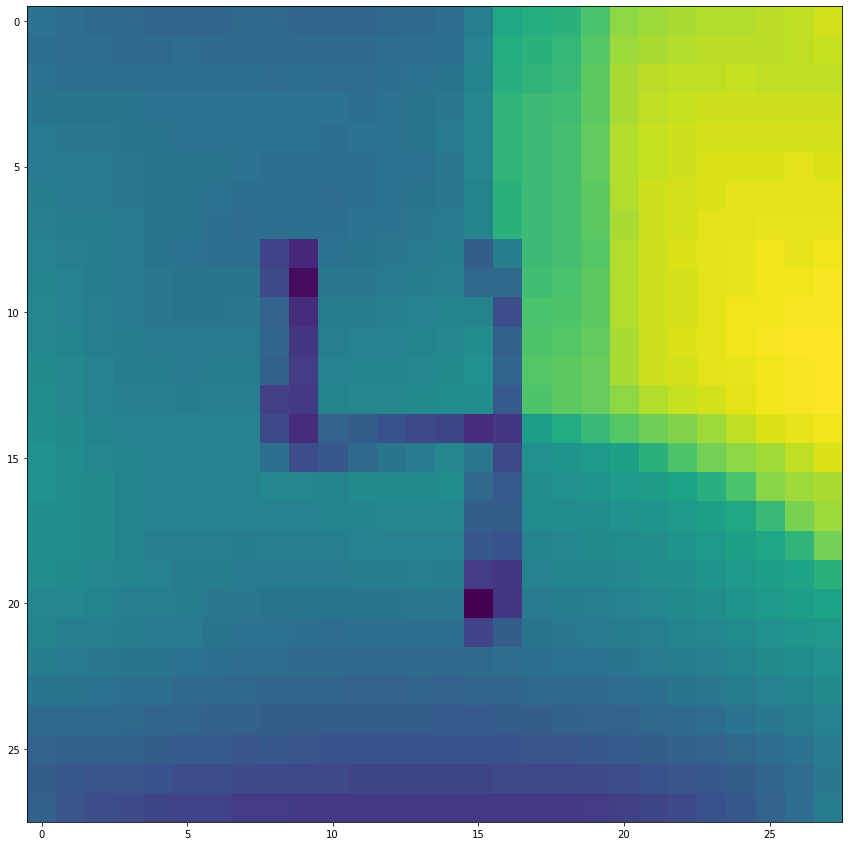

In [26]:
plt.figure(figsize=(15,15))
plt.imshow(img)

In [19]:
cv2.imshow('Image', img)
cv2.waitKey(0) 
cv2.destroyAllWindows()

-1